In [38]:
#Definición de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.preprocessing import StandardScaler
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [39]:
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [40]:
#Creación del dataframe
#datos = pd.read_csv(filepath_or_buffer = "/Users/UTEQ/Documents/UTEQ/Academias/Extracción de conocimiento en bases de datos/analisis.csv")
datos = pd.read_csv("C:\\Users\\espin\\Downloads\\cliente_tienda.csv", encoding='latin-1')
datos.head()

,CustomerID,Genero,Edad,Ingresos Anuales ($),Porcentaje de gastos (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [41]:
datos.describe()

,CustomerID,Edad,Ingresos Anuales ($),Porcentaje de gastos (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


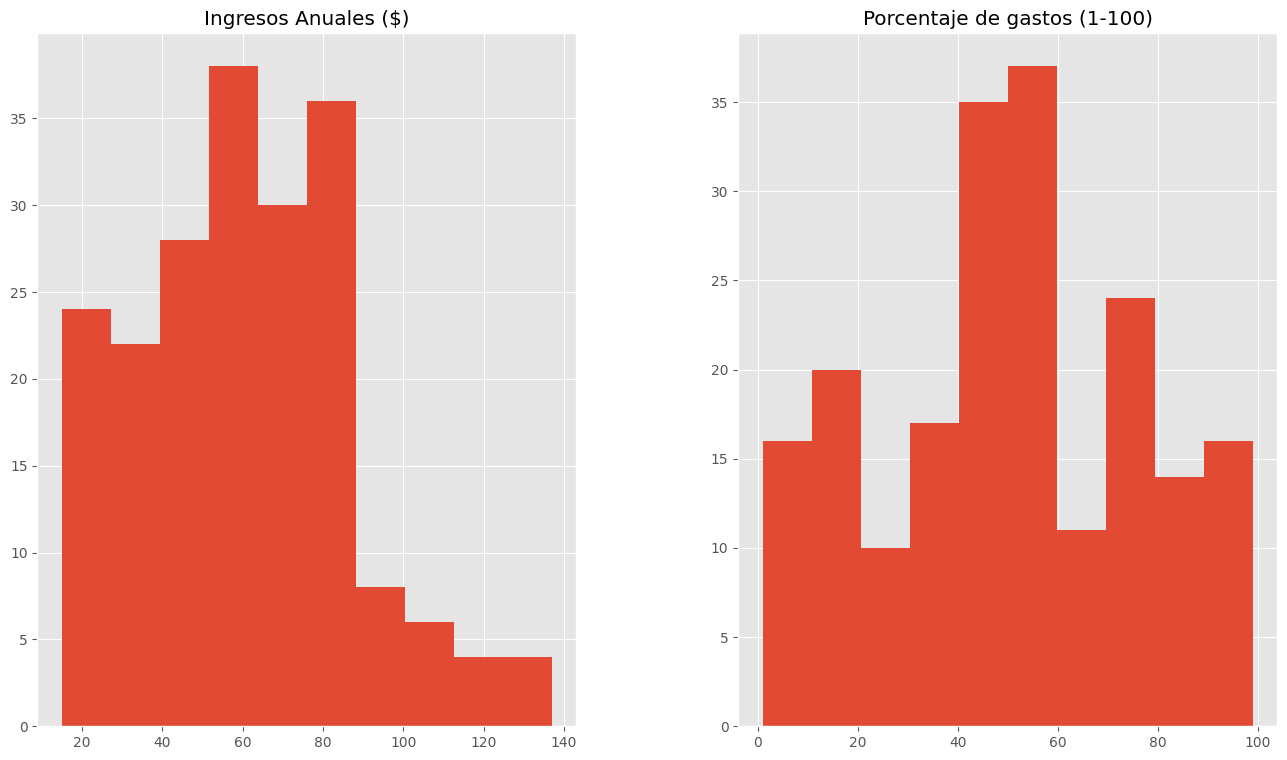

In [43]:
datos.drop(columns=['CustomerID', 'Edad']).hist()
plt.show()

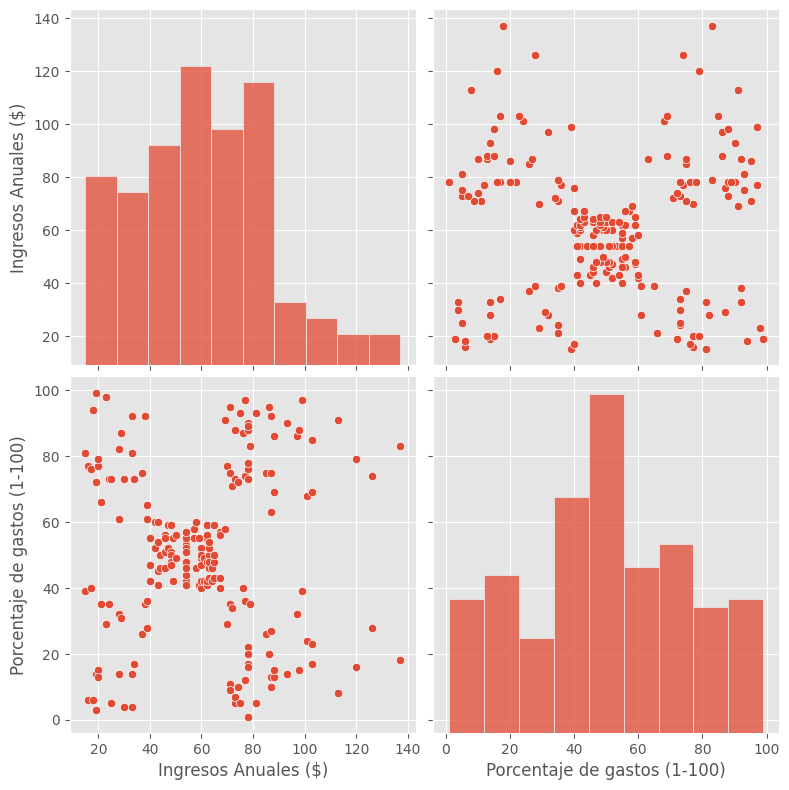

In [9]:
sb.pairplot(datos[['Ingresos Anuales ($)', 'Porcentaje de gastos (1-100)']], height=4, kind='scatter')

In [50]:
#Definir entradas
# Seleccionar características numéricas para clustering
X = datos[['Ingresos Anuales ($)', 'Porcentaje de gastos (1-100)']]

In [51]:
# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

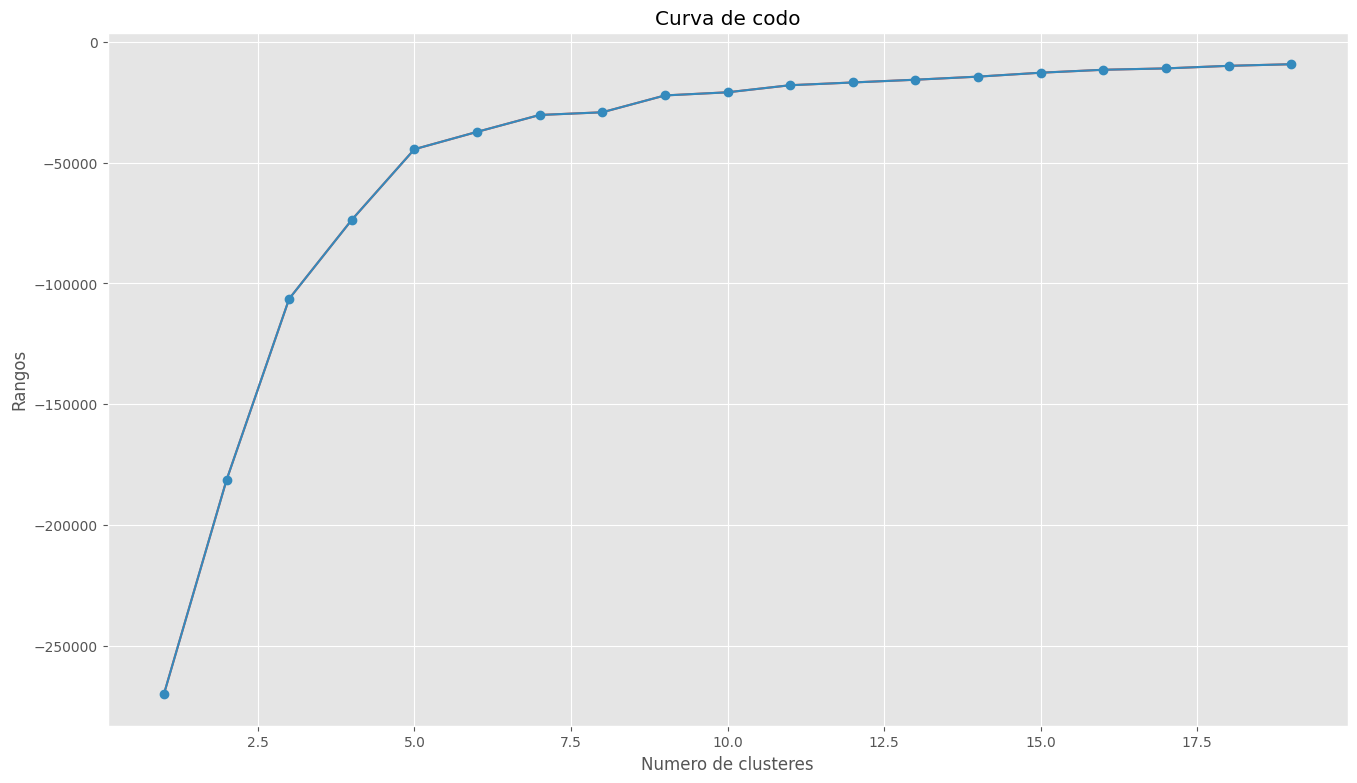

In [52]:
#Obtener valor de K
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.plot(Nc,score, marker='o')
plt.xlabel('Numero de clusteres')
plt.ylabel('Rangos')
plt.title('Curva de codo')
plt.show()

In [53]:
#Ejecutar K-Means
kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[87.         18.63157895]
 [60.51937984 64.90697674]
 [30.27272727 29.06060606]]


In [54]:
# Predicción de clusteres
labels = kmeans.predict(X)

In [55]:
print(X.shape)

(200, 2)


In [56]:
# Crear y ajustar el modelo K-Means
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
labels = kmeans.fit_predict(X_scaled)

In [57]:
# Agregar las etiquetas al DataFrame original
datos['Cluster'] = labels

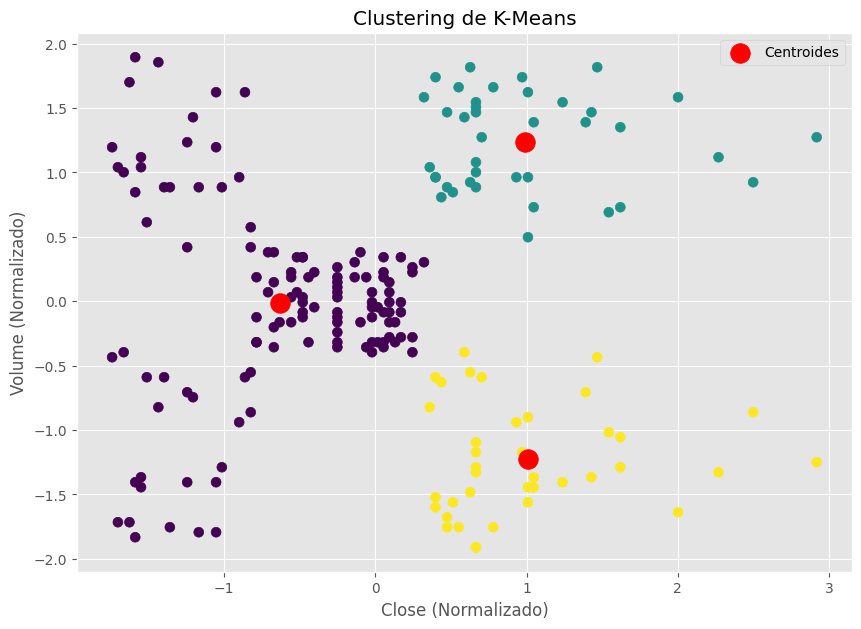

In [58]:
plt.figure(figsize=(10, 7))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroides')
plt.xlabel('Close (Normalizado)')
plt.ylabel('Volume (Normalizado)')
plt.title('Clustering de K-Means')
plt.legend()
plt.show()